In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from kmodes.kmodes import KModes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, precision_recall_fscore_support, confusion_matrix, classification_report, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Datasets

In [4]:
df = pd.read_csv('/work/CardiovascularHeartDisease/Data/cardio_data.csv')
df.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease,BMI
0,50,2,168,62,110,80,1,1,0,0,1,0,21
1,55,1,156,85,140,90,3,1,0,0,1,1,34
2,51,1,165,64,130,70,3,1,0,0,0,1,23
3,48,2,169,82,150,100,1,1,0,0,1,1,28
4,47,1,156,56,100,60,1,1,0,0,0,0,23


## Transforming Dataset

In [5]:
# Transforming the column AGE(measured in days) for Age_Bin
# age_bin in quinquenium 5 years spam
df['age_bin'] = pd.cut(df['age'], [0,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], 
                              labels=['0-20', '20-30', '30-35', '35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','90-95','95-100'])

Here, I am grouping or binning `age` column into categories based on a 5-year interval. `Age_bin` is a variable or column name that likely contains individual age values, while `quinquenium` refers to a period of 5 years.

For example, if we have a dataset with age information, we can use this method to group the ages into 5-year intervals, such as 0-4 years, 5-9 years, 10-14 years, and so on. Each of these intervals can then be assigned a label or category, such as "0-4", "5-9", "10-14", etc., which can be used as input for statistical analyses or machine learning algorithms.

In [6]:
# Transforming the column bmi in Body Mass Index Classes (1 to 6)

# Adding Body Mass Index
df['bmi'] = df['weight']/((df['height']/100)**2)

rating = []
for row in df['bmi']:
    if row < 18.5 :    
        rating.append(1) #UnderWeight
    elif row > 18.5 and row  < 24.9:   
        rating.append(2) #NormalWeight
    elif row > 24.9 and row < 29.9:  
        rating.append(3) #OverWeight
    elif row > 29.9 and row < 34.9:  
        rating.append(4) #ClassObesity_1
    elif row > 34.9 and row < 39.9:  
        rating.append(5) #ClassObesity_2
    elif row > 39.9 and row < 49.9:  
        rating.append(6) #ClassObesity_3
    elif row > 49.9:  
        rating.append('Error')
        
    else:           
        rating.append('Not_Rated')

# inserting Column
df['BMI_Class'] = rating

In [7]:
# creating a Column for MAP
df['MAP'] = ((2* df['diastolic']) + df['systolic']) / 3

#Creating Classes for MAP
map_values = []
for row in df['MAP']:
    if row < 69.9:    
        map_values.append(1) #Low
    elif row > 70 and row  < 79.9:   
        map_values.append(2)#Normal
    elif row > 79.9 and row < 89.9:  
        map_values.append(3)#Normal
    elif row > 89.9 and row < 99.9:  
        map_values.append(4)#Normal
    elif row > 99.9 and row < 109.9:  
        map_values.append(5)#High
    elif row > 109.9 and row < 119.9:  
        map_values.append(6)#Normal
    elif row > 119.9:  
        map_values.append(7)
        
    else:           
        map_values.append('Not_Rated')

#inserting MAP_Class Column
df['MAP_Class'] = map_values

`Mean Arterial Pressure (MAP)` = ((2* Diastollic Blood Pressure) + Sistolic Blood Pressure) / 3

The overall blood pressure as measured in the brachial artery is maintained by the cardiac output and the total peripheral resistance (TPR) to flow. The mean arterial pressure (MAP) is calculated using the formula above

In [8]:
# Reordering Columns
df= df[["age","gender","height","weight","BMI","bmi","systolic","diastolic","MAP","age_bin","BMI_Class","MAP_Class","cholesterol","glucose","smoke","alcohol","active","cardiovascular_disease"]]
df.head()

,age,gender,height,weight,BMI,bmi,systolic,diastolic,MAP,age_bin,BMI_Class,MAP_Class,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease
0,50,2,168,62,21,21.967120,110,80,90.000000,45-50,2,4,1,1,0,0,1,0
1,55,1,156,85,34,34.927679,140,90,106.666667,50-55,5,5,3,1,0,0,1,1
2,51,1,165,64,23,23.507805,130,70,90.000000,50-55,2,4,3,1,0,0,0,1
3,48,2,169,82,28,28.710479,150,100,116.666667,45-50,3,6,1,1,0,0,1,1
4,47,1,156,56,23,23.011177,100,60,73.333333,45-50,2,2,1,1,0,0,0,0


In [9]:
# only Categorical Data Columns DataFrame
df_cat = df[["gender","age_bin","BMI_Class","MAP_Class","cholesterol","glucose","smoke","alcohol","active","cardiovascular_disease"]]

# Label encoder for categorical data column
le = LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)
df_cat.head()

,gender,age_bin,BMI_Class,MAP_Class,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease
0,1,3,1,2,0,0,0,0,1,0
1,0,4,4,3,2,0,0,0,1,1
2,0,4,1,2,2,0,0,0,0,1
3,1,3,2,4,0,0,0,0,1,1
4,0,3,1,0,0,0,0,0,0,0


## K-Modes Analyses

In [10]:
# Splitting the dataset into male and female 
df_male = df_cat.query("gender == 0")
df_female = df_cat.query("gender == 1")

### Elbow Curve

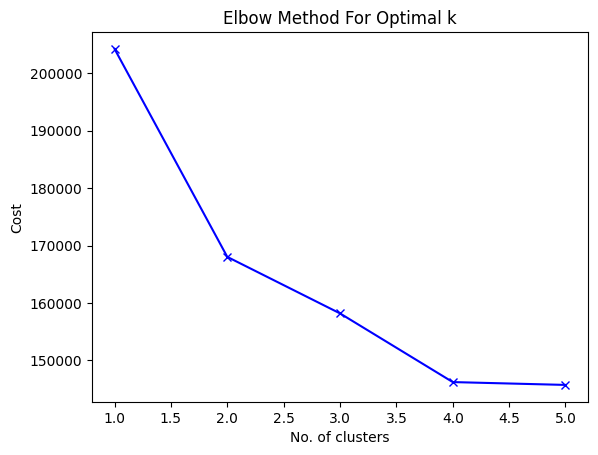

In [11]:
# Elbow curve to find optimal K in Huang init
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=0)
    kmode.fit_predict(df_cat)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

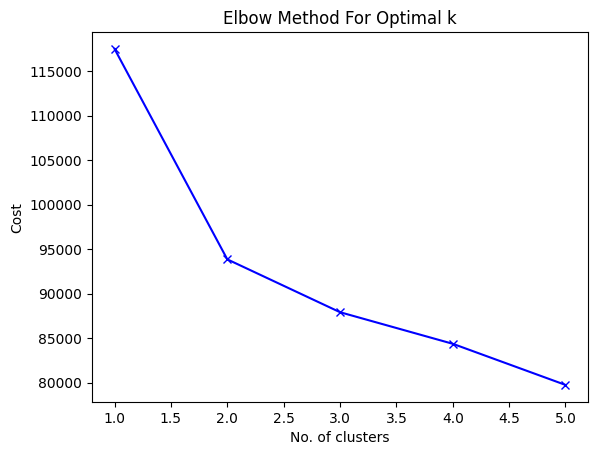

In [12]:
# For male data
# Elbow curve to find optimal K in Huang
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=0)
    kmode.fit_predict(df_male)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

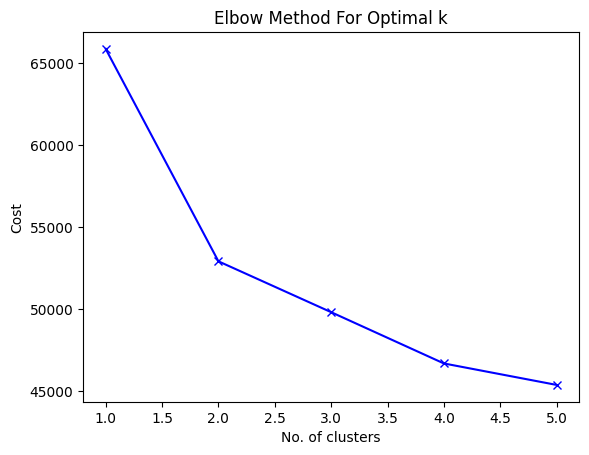

In [13]:
# For Female Data
# Elbow curve to find optimal K
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=0)
    kmode.fit_predict(df_female)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

The code above is using the `Elbow` method to find the optimal number of clusters (K) for the general dataset, male and female dataset using the `Huang` initialization method in the KModes clustering algorithm. The cost of the clustering is calculated for each value of K (ranging from 1 to 5) and plotted on a graph. The code then displays the graph with the number of `clusters` on the x-axis and the cost on the y-axis. The `Elbow` method is a heuristic method used to determine the optimal number of clusters based on the point of inflection in the cost graph (i.e., the elbow point).

The best number os clusters for the general data in `Huang` Init is **2**
The best number os clusters for male Data in `Huang` Init is **2**
The best number os clusters for female Data in `Huang` Init is **2**

### Building the model using K-Mode with Huang initialization

In [14]:
# female data
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=0)
clusters_huang_1 = km_huang.fit_predict(df_female)
clusters_huang_1

array([0, 1, 1, ..., 1, 0, 0], dtype=uint16)

In [15]:
# male data
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=0)
clusters_huang_2 = km_huang.fit_predict(df_male)
clusters_huang_2

array([0, 0, 0, ..., 1, 1, 1], dtype=uint16)

The code above is using the KModes clustering algorithm to build a model for both male & female dataset with two clusters, using the `Huang` initialization method.

The `KModes` algorithm is a clustering algorithm designed to work with categorical data. It groups together similar instances based on the similarity of their categorical attributes.

The `n_init` parameter specifies the number of times the algorithm will be run with different initial centroids. The verbose parameter controls the level of output messages printed during the clustering process.

The `fit_predict` method fits the model to the dataset (df_female & df_female) and returns an array of cluster assignments, where each element represents the cluster assignment for the corresponding row of the input data.

The `clusters_huang_1 & clusters_huang_2` variable contains the cluster assignments for each row in the df_female & df_male dataset respectively. This variable can be used to perform further analysis of the data, such as evaluating the quality of the clustering or identifying which instances belong to which cluster.

In [16]:
# Inserting clusters in DataFrame
df_female.insert(0,"Cluster", clusters_huang_1, True)
df_male.insert(0, "Cluster", clusters_huang_2, True)

In [17]:
df_female.head()

,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease
0,0,1,3,1,2,0,0,0,0,1,0
3,1,1,3,2,4,0,0,0,0,1,1
7,1,1,6,3,3,2,2,0,0,1,1
11,0,1,4,1,2,0,0,0,0,1,0
12,0,1,1,1,2,0,0,0,0,0,0


In [18]:
df_male.head()

,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease
1,0,0,4,4,3,2,0,0,0,1,1
2,0,0,4,1,2,2,0,0,0,0,1
4,0,0,3,1,0,0,0,0,0,0,0
5,1,0,5,2,2,1,1,0,0,0,0
6,0,0,5,4,2,2,0,0,0,1,0


In [19]:
# replacing cluster column values to merge dataframes after
df_male["Cluster"].replace({0:2, 1:3}, inplace=True)
df_male.head()

,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease
1,2,0,4,4,3,2,0,0,0,1,1
2,2,0,4,1,2,2,0,0,0,0,1
4,2,0,3,1,0,0,0,0,0,0,0
5,3,0,5,2,2,1,1,0,0,0,0
6,2,0,5,4,2,2,0,0,0,1,0


In [20]:
# merging female and male data
df_clusters = pd.concat([df_female, df_male], ignore_index=True, sort=False)
df_clusters.head(10)

,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease
0,0,1,3,1,2,0,0,0,0,1,0
1,1,1,3,2,4,0,0,0,0,1,1
2,1,1,6,3,3,2,2,0,0,1,1
3,0,1,4,1,2,0,0,0,0,1,0
4,0,1,1,1,2,0,0,0,0,0,0
5,0,1,5,1,1,0,0,1,0,1,0
6,0,1,4,3,2,0,0,0,0,1,0
7,0,1,1,1,2,0,0,0,0,1,0
8,0,1,5,2,2,0,2,0,0,0,0
9,1,1,5,2,3,2,0,0,0,0,1


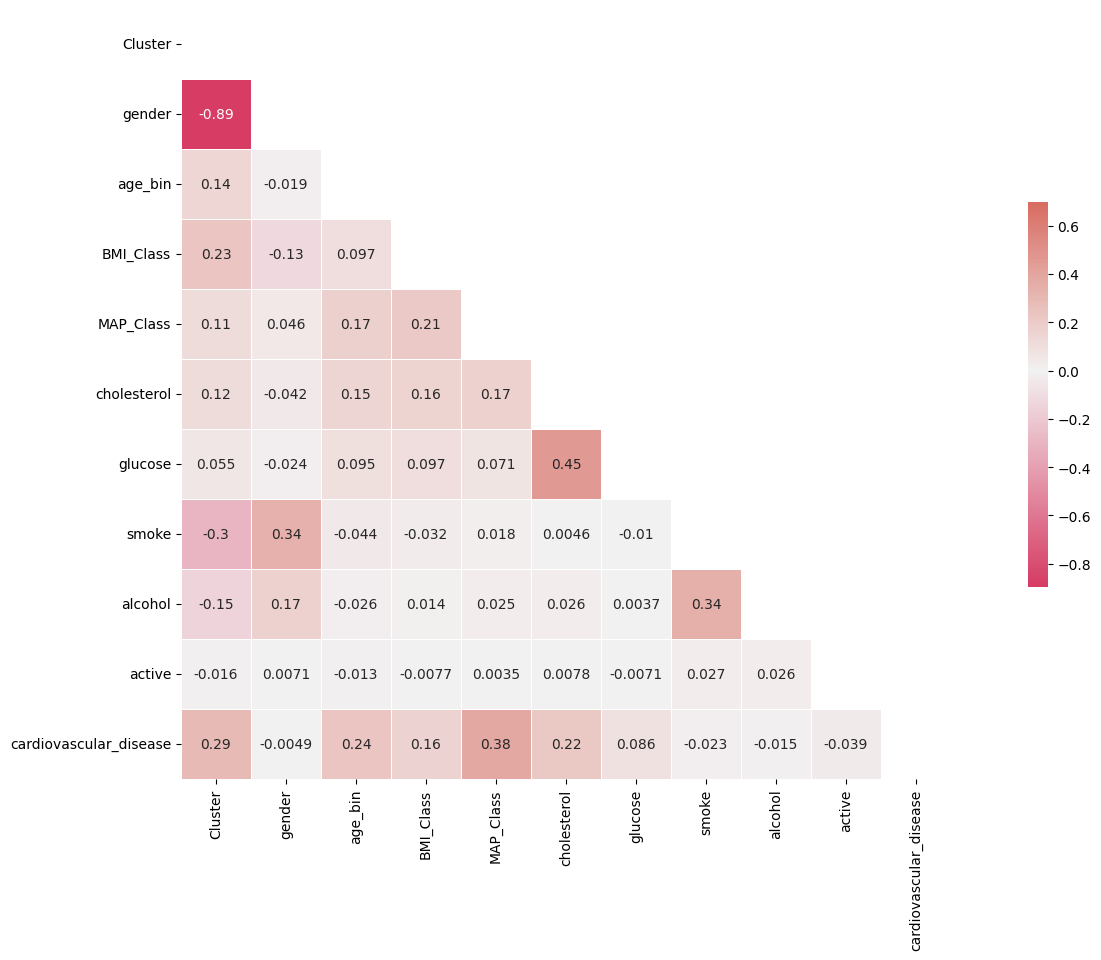

In [21]:
# Correlation
corr = df_clusters.corr()
cmap = sns.diverging_palette(2, 15, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## Machine Learning

In [22]:
X = df_clusters.drop('cardiovascular_disease', axis=1)
y = df_clusters['cardiovascular_disease']

# Split the data into training and testing sets. 80% of data is training data, set aside other 20% for test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remaining 80% is split into valuation and test sets. 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [23]:
# Instantiate the models
decision_tree = DecisionTreeClassifier()
# Fit and evaluate the DecisionTree Classifier model
decision_tree.fit(X_train, y_train)
# Predict the model on X_val and X_test
y_val_pred = decision_tree.predict(X_val)
y_test_pred = decision_tree.predict(X_test)
# Cross-validate the result
cv_scores = cross_val_score(decision_tree, X_train_val, y_train_val, cv=5).mean()
print("DecisionTree Classifier")
print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_test_pred)}")
print(f"Cross-validation score: {cv_scores}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_test_pred)}\n")

DecisionTree Classifier
Accuracy on validation set: 0.8580929420566963
Accuracy on test set: 0.8594230609360711
Cross-validation score: 0.8560532058609581
Confusion matrix:
[[5574  598]
 [1093 4764]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      6172
           1       0.89      0.81      0.85      5857

    accuracy                           0.86     12029
   macro avg       0.86      0.86      0.86     12029
weighted avg       0.86      0.86      0.86     12029




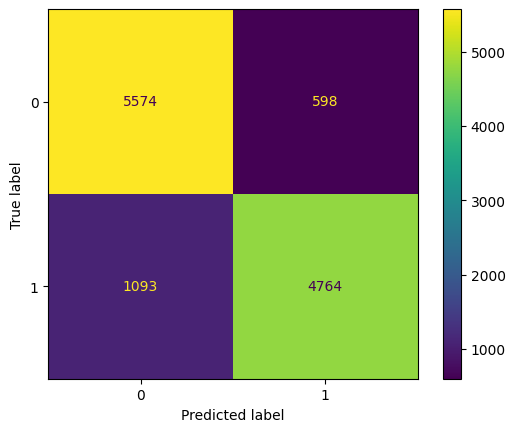

In [24]:
plot_confusion_matrix(decision_tree, X_test, y_test);

In [25]:
# Instantiate the models
logreg_kmodes = LogisticRegression()
# Fit and evaluate the Logistic Regression model
logreg_kmodes.fit(X_train, y_train)
y_val_pred = logreg_kmodes.predict(X_val)
y_test_pred = logreg_kmodes.predict(X_test)
# Cross-validate the model
cv_scores = cross_val_score(logreg_kmodes, X_train_val, y_train_val, cv=5).mean()
print("Logistic Regression")
print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_test_pred)}")
print(f"Cross-validation score: {cv_scores}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_test_pred)}\n")

Logistic Regression
Accuracy on validation set: 0.8243411754925597
Accuracy on test set: 0.8242580430625988
Cross-validation score: 0.8169593681804012
Confusion matrix:
[[5503  669]
 [1445 4412]]
Classification report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      6172
           1       0.87      0.75      0.81      5857

    accuracy                           0.82     12029
   macro avg       0.83      0.82      0.82     12029
weighted avg       0.83      0.82      0.82     12029




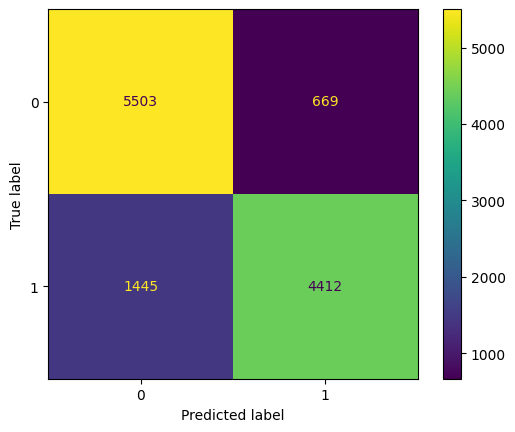

In [26]:
plot_confusion_matrix(logreg_kmodes, X_test, y_test);

In [27]:
# Instantiate the models
ada_kmodes = AdaBoostClassifier()
# Fit and evaluate the Adaboost Classifier model
ada_kmodes.fit(X_train, y_train)
y_val_pred = ada_kmodes.predict(X_val)
y_test_pred = ada_kmodes.predict(X_test)
# Cross-Validate the result
cv_scores = cross_val_score(ada_kmodes, X_train_val, y_train_val, cv=5).mean()

print("Adaboost Classifier")
print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_test_pred)}")
print(f"Cross-validation score: {cv_scores}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_test_pred)}\n")

Adaboost Classifier
Accuracy on validation set: 0.8286640618505279
Accuracy on test set: 0.8292459888602544
Cross-validation score: 0.8289099033565417
Confusion matrix:
[[5294  878]
 [1176 4681]]
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      6172
           1       0.84      0.80      0.82      5857

    accuracy                           0.83     12029
   macro avg       0.83      0.83      0.83     12029
weighted avg       0.83      0.83      0.83     12029




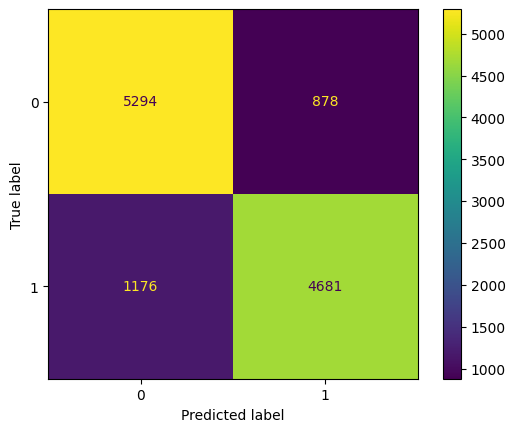

In [28]:
plot_confusion_matrix(ada_kmodes, X_test, y_test);

In [29]:
# Instantiate the models
gb_kmodes = GradientBoostingClassifier()
# Fit and evaluate the Gradientboost Classifier model
gb_kmodes.fit(X_train, y_train)
y_val_pred = gb_kmodes.predict(X_val)
y_test_pred = gb_kmodes.predict(X_test)
# Cross-validate the model
cv_scores = cross_val_score(gb_kmodes, X_train_val, y_train_val, cv=5).mean()

print("Gradientboost Classifier")
print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_test_pred)}")
print(f"Cross-validation score: {cv_scores}")
print(f"Classification report:\n{classification_report(y_test, y_test_pred)}\n")

Gradientboost Classifier
Accuracy on validation set: 0.8571784853271261
Accuracy on test set: 0.8599218555158368
Cross-validation score: 0.8551179465863037
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      6172
           1       0.86      0.85      0.86      5857

    accuracy                           0.86     12029
   macro avg       0.86      0.86      0.86     12029
weighted avg       0.86      0.86      0.86     12029




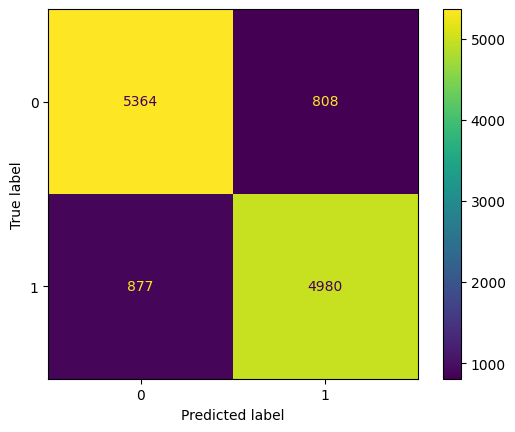

In [30]:
plot_confusion_matrix(gb_kmodes, X_test, y_test);

In [31]:
# Instantiate the models
rf_kmodes = RandomForestClassifier()
# Fit and evaluate the Random Forest Classifier model
rf_kmodes.fit(X_train, y_train)
y_val_pred = rf_kmodes.predict(X_val)
y_test_pred = rf_kmodes.predict(X_test)
# Cross-Validate the model
cv_scores = cross_val_score(rf_kmodes, X_train_val, y_train_val, cv=5).mean()

print("RandomForest Classifier")
print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_test_pred)}")
print(f"Cross-validation score: {cv_scores}")
print(f"Classification report:\n{classification_report(y_test, y_test_pred)}\n")

RandomForest Classifier
Accuracy on validation set: 0.8605869149555242
Accuracy on test set: 0.8629146229944301
Cross-validation score: 0.8581523433440715
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      6172
           1       0.89      0.83      0.85      5857

    accuracy                           0.86     12029
   macro avg       0.86      0.86      0.86     12029
weighted avg       0.86      0.86      0.86     12029




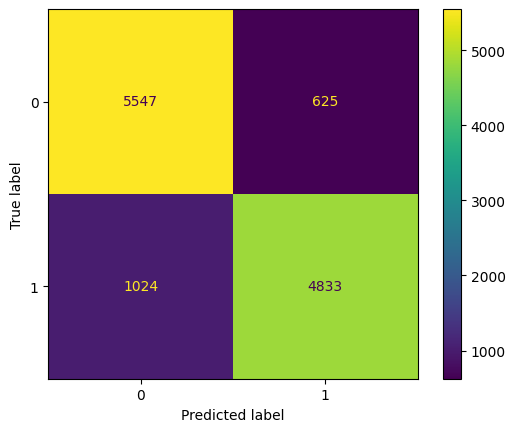

In [32]:
plot_confusion_matrix(rf_kmodes, X_test, y_test);

### Hyperparameter Tuning

In [33]:
# Train Decision Tree Classifier with the best hyperparameters
dt_best = DecisionTreeClassifier(min_samples_split= 10, min_samples_leaf= 2, max_features= None, max_depth= 10, criterion= 'entropy', class_weight= None, random_state=42)
dt_best.fit(X_train, y_train)

# Evaluate the model on validation set
y_pred = dt_best.predict(X_val)
acc_val = accuracy_score(y_val, y_pred)

# Evaluate the model on test set
y_pred = dt_best.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(dt_best, X_train_val, y_train_val, cv=5)

# Print the performance metrics
print("Decision Tree Classifier - RandomSearchCV")
print("Accuracy on validation set: {:.2f}%".format(acc_val*100))
print("Accuracy on test set: {:.2f}%".format(acc_test*100))
print("Cross-validation score: {:.2f}% (+/- {:.2f}%)".format(cv_scores.mean()*100, cv_scores.std()*2*100))
print("Classification report:\n", classification_report(y_test, y_pred))

Decision Tree Classifier - RandomSearchCV
Accuracy on validation set: 86.25%
Accuracy on test set: 86.47%
Cross-validation score: 86.28% (+/- 0.95%)
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      6172
           1       0.89      0.82      0.86      5857

    accuracy                           0.86     12029
   macro avg       0.87      0.86      0.86     12029
weighted avg       0.87      0.86      0.86     12029



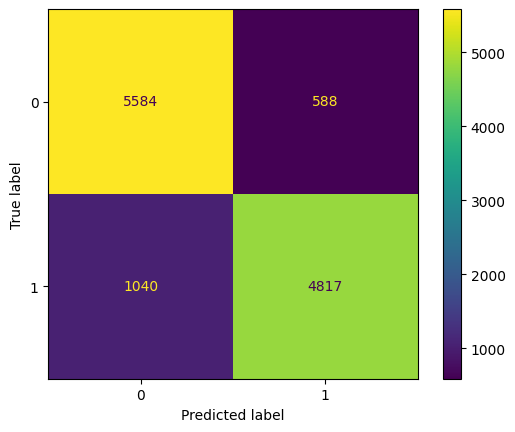

In [34]:
plot_confusion_matrix(dt_best, X_test, y_test);

In [35]:
# Train Decision Tree Classifier with the best hyperparameters
dt_best_grid = DecisionTreeClassifier(min_samples_split= 2, min_samples_leaf= 2, max_features= None, max_depth= 10, criterion= 'gini', class_weight= None, random_state=42)
dt_best_grid.fit(X_train, y_train)

# Evaluate the model on validation set
y_pred = dt_best_grid.predict(X_val)
acc_val = accuracy_score(y_val, y_pred)

# Evaluate the model on test set
y_pred = dt_best_grid.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(dt_best_grid, X_train_val, y_train_val, cv=5)

# Print the performance metrics
print("Decision Tree Classifier- GridSearchCV")
print("Accuracy on validation set: {:.2f}%".format(acc_val*100))
print("Accuracy on test set: {:.2f}%".format(acc_test*100))
print("Cross-validation score: {:.2f}% (+/- {:.2f}%)".format(cv_scores.mean()*100, cv_scores.std()*2*100))
print("Classification report:\n", classification_report(y_test, y_pred))

Decision Tree Classifier- GridSearchCV
Accuracy on validation set: 86.18%
Accuracy on test set: 86.42%
Cross-validation score: 86.24% (+/- 1.02%)
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      6172
           1       0.89      0.82      0.85      5857

    accuracy                           0.86     12029
   macro avg       0.87      0.86      0.86     12029
weighted avg       0.87      0.86      0.86     12029



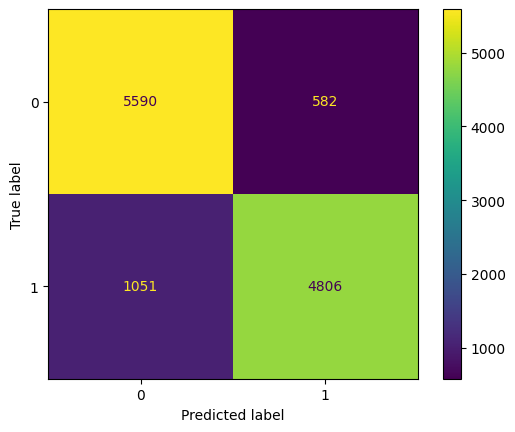

In [36]:
plot_confusion_matrix(dt_best_grid, X_test, y_test);

In [37]:
# Train Random Forest with the best hyperparameters
rf_randomcv = RandomForestClassifier(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 4, max_features= None, max_depth= 10, criterion= 'gini', class_weight= 'balanced_subsample', bootstrap= True, random_state=42)
rf_randomcv.fit(X_train, y_train)

# Evaluate the model on validation set
y_pred = rf_randomcv.predict(X_val)
acc_val = accuracy_score(y_val, y_pred)

# Evaluate the model on test set
y_pred = rf_randomcv.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(rf_randomcv, X_train_val, y_train_val, cv=5)

# Print the performance metrics
print("Random Forest - RandomizedSearchCV")
print("Accuracy on validation set: {:.2f}%".format(acc_val*100))
print("Accuracy on test set: {:.2f}%".format(acc_test*100))
print("Cross-validation score: {:.2f}% (+/- {:.2f}%)".format(cv_scores.mean()*100, cv_scores.std()*2*100))
print("Classification report:\n", classification_report(y_test, y_pred))

Random Forest - RandomizedSearchCV
Accuracy on validation set: 86.52%
Accuracy on test set: 86.57%
Cross-validation score: 86.40% (+/- 0.85%)
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      6172
           1       0.89      0.82      0.86      5857

    accuracy                           0.87     12029
   macro avg       0.87      0.86      0.87     12029
weighted avg       0.87      0.87      0.87     12029



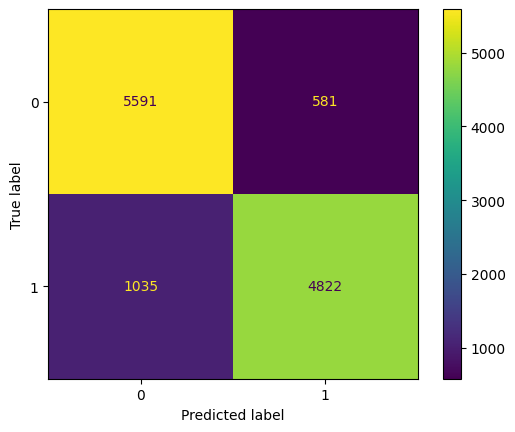

In [38]:
plot_confusion_matrix(rf_randomcv, X_test, y_test);

In [39]:
# Train Random Forest with the best hyperparameters
rf_gridcv = RandomForestClassifier(n_estimators= 50, min_samples_split= 2, min_samples_leaf= 4, max_features= None, max_depth= 10, criterion= 'entropy', class_weight= 'balanced_subsample', bootstrap= True, random_state=42)
rf_gridcv.fit(X_train, y_train)

# Evaluate the model on validation set
y_pred = rf_gridcv.predict(X_val)
acc_val = accuracy_score(y_val, y_pred)

# Evaluate the model on test set
y_pred = rf_gridcv.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(rf_gridcv, X_train_val, y_train_val, cv=5)

# Print the performance metrics
print("Random Forest - GridSearchCV")
print("Accuracy on validation set: {:.2f}%".format(acc_val*100))
print("Accuracy on test set: {:.2f}%".format(acc_test*100))
print("Cross-validation score: {:.2f}% (+/- {:.2f}%)".format(cv_scores.mean()*100, cv_scores.std()*2*100))
print("Classification report:\n", classification_report(y_test, y_pred))

Random Forest - GridSearchCV
Accuracy on validation set: 86.48%
Accuracy on test set: 86.61%
Cross-validation score: 86.42% (+/- 0.87%)
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      6172
           1       0.89      0.82      0.86      5857

    accuracy                           0.87     12029
   macro avg       0.87      0.86      0.87     12029
weighted avg       0.87      0.87      0.87     12029



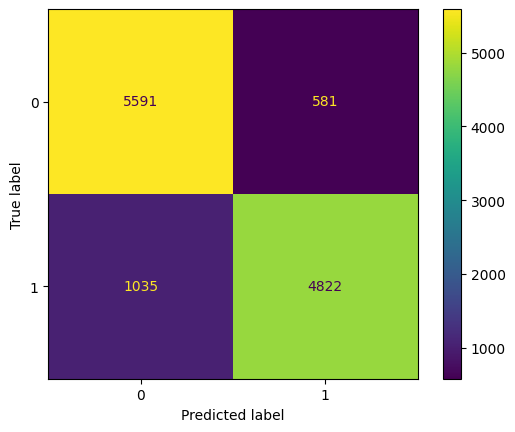

In [40]:
plot_confusion_matrix(rf_randomcv, X_test, y_test);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ce76747e-b0f1-459f-822a-5c7e53ff363d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>